<a href="https://colab.research.google.com/github/nitinjindal7/Data-project/blob/main/Dataproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Walmart_Sales.csv to Walmart_Sales.csv
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
RMSE: 3.259616170641191
R² Score: 0.9932674277566179


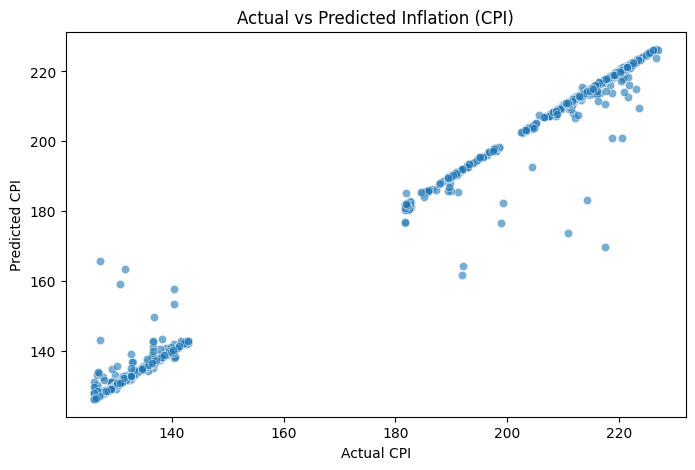

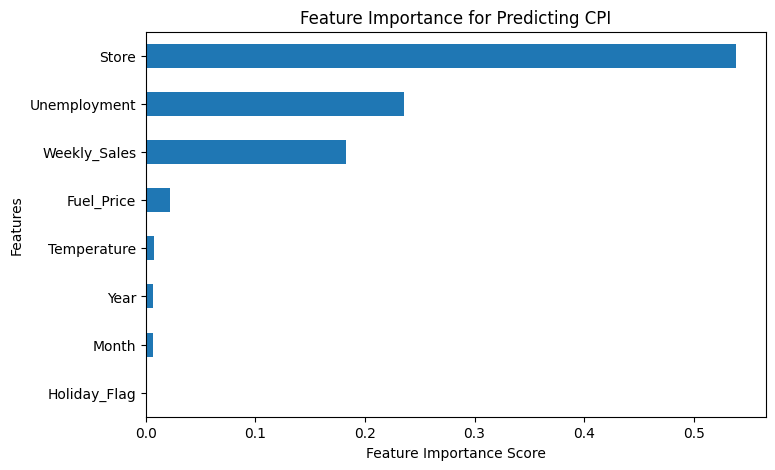

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os

from google.colab import files

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
new_path = f"/mnt/data/{file_name}"
os.makedirs("/mnt/data/", exist_ok=True)
os.rename(file_name, new_path)
df = pd.read_csv(new_path)

print(df.head())
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df.drop(columns=['Date'], inplace=True)
df.fillna(df.median(), inplace=True)

X = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'Unemployment', 'Store', 'Year', 'Month']]
y = df['CPI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual CPI")
plt.ylabel("Predicted CPI")
plt.title("Actual vs Predicted Inflation (CPI)")
plt.show()

feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5))
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Predicting CPI")
plt.show()